In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer

# Standard **Scaling**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

In [ ]:
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'height':[165,170,175,180,185],
    'weight':[55,60,65,70,75]
})
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [ ]:
# import the scaler
scaler=StandardScaler() #(-3,+3)
# fit the scaler on data
scaled_df=scaler.fit_transform(df)
scaled_df

array([[-1.41421356, -1.41421356, -1.41421356],
       [-0.70710678, -0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356]])

In [ ]:
# convert data in to data frame
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# **MinMaxScaler**

In [ ]:
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'height':[165,170,175,180,185],
    'weight':[55,60,65,70,75]
})
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [ ]:
# import the scaler
scaler=MinMaxScaler() #(0,1)
# fit the scaler on data
scaled_df=scaler.fit_transform(df)
scaled_df

array([[0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  ]])

In [ ]:
# convert data in to data frame
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# Max ABS **Scaler**

In [ ]:
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'height':[165,170,175,180,185],
    'weight':[55,60,65,70,75]
})
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [ ]:
# import the scaler
scaler=MaxAbsScaler() #(-1,+1)
# fit the scaler on data
scaled_df=scaler.fit_transform(df)
scaled_df

array([[0.55555556, 0.89189189, 0.73333333],
       [0.66666667, 0.91891892, 0.8       ],
       [0.77777778, 0.94594595, 0.86666667],
       [0.88888889, 0.97297297, 0.93333333],
       [1.        , 1.        , 1.        ]])

In [ ]:
# convert data in to data frame
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# Robust **Scaler**
--> Also Handle outliers

In [ ]:
df=pd.DataFrame({
    'age':[25,30,35,40,45],
    'height':[165,170,175,180,185],
    'weight':[55,60,65,70,75]
})
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [ ]:
# import the scaler
scaler=RobustScaler() #(-1,+1)
# fit the scaler on data
scaled_df=scaler.fit_transform(df)
scaled_df

array([[-1. , -1. , -1. ],
       [-0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ]])

In [ ]:
# convert data in to data frame
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


# **Transformation**

In [16]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
df=np.random.exponential(size=1000,scale=2)
df=pd.DataFrame(df,columns=['values'])
df.head()
# df.shape

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

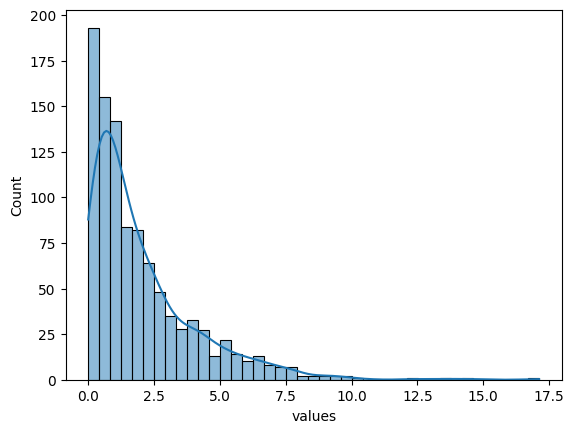

In [14]:
sns.histplot(df['values'],kde=True)

In [20]:
pt_boxcox= PowerTransformer(method='box-cox') # Data must be +ve
pt_yeo_johnson=PowerTransformer(method='yeo-johnson')
qt_normal=QuantileTransformer(output_distribution='normal')
df['Box_Cox']=pt_boxcox.fit_transform(df[['values']]+1)
df['Teo_Johnson']=pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile']=qt_normal.fit_transform(df[['values']])
df.head()

,values,Box_Cox,Teo_Johnson,Quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


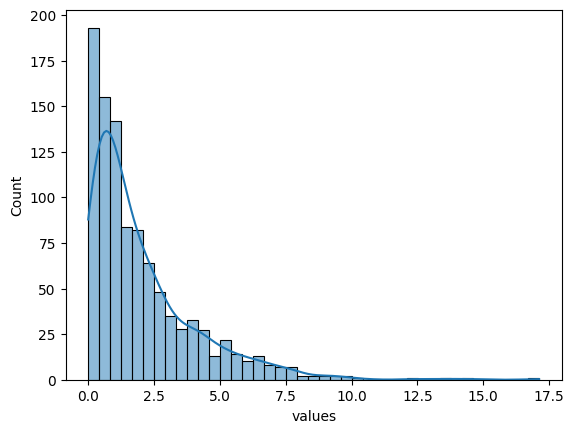

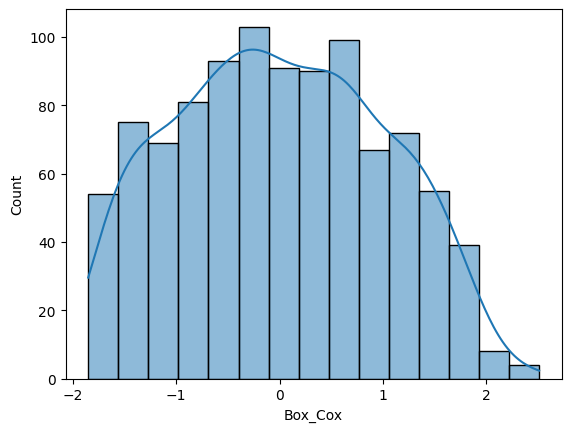

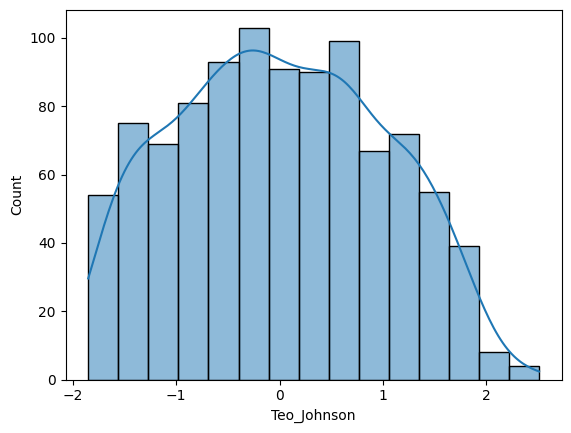

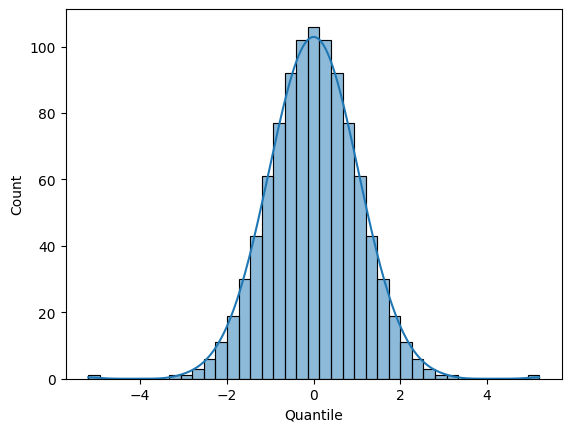

In [21]:
for col in df.columns:
  sns.histplot(df[col],kde=True)
  plt.show()

# **Normalization**

In [23]:
# L2 Normalization(for text data)
data=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


In [24]:
# L1 Normalization
data=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# **Log Transformation**

In [25]:
df=pd.DataFrame({'Values':[1,5,10,20,30,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}) # Skew Data
df.head()

,Values
0,1
1,5
2,10
3,20
4,30


<Axes: xlabel='Values', ylabel='Count'>

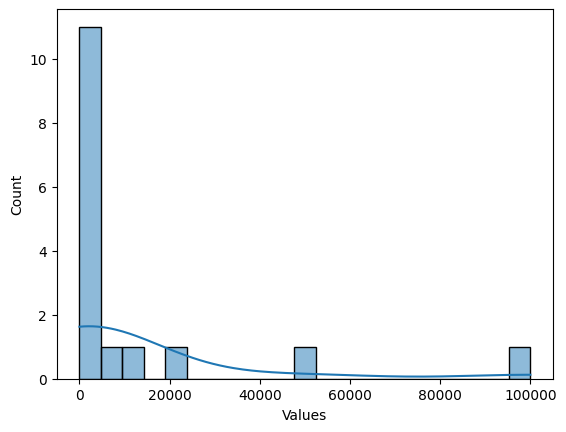

In [26]:
sns.histplot(df['Values'],kde=True)

In [28]:
df['log_values']=np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,30,3.401197
5,50,3.912023
6,100,4.605170
7,200,5.298317
8,500,6.214608
9,1000,6.907755


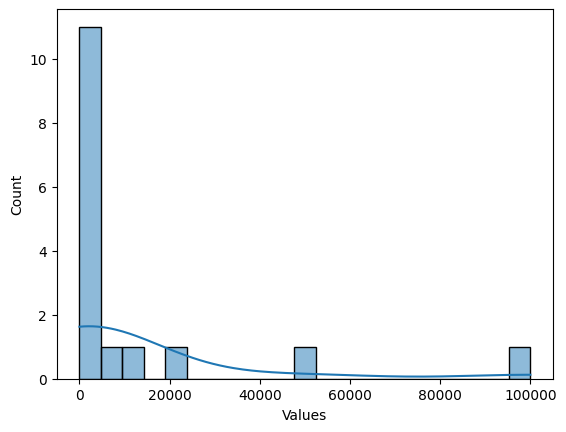

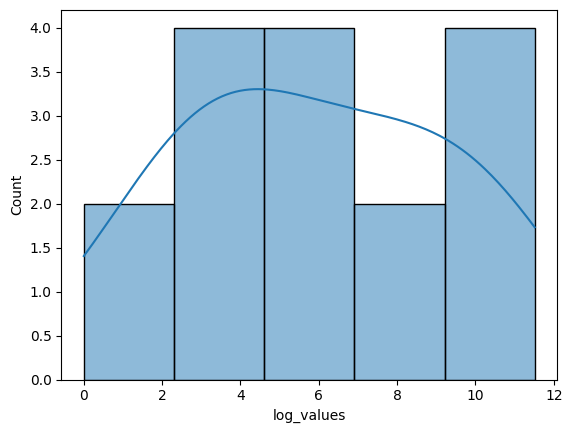

In [29]:
for col in df.columns:
  sns.histplot(df[col],kde=True)
  plt.show()